## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data.loc[mouse_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data.loc[mouse_data.duplicated(["Mouse ID", "Timepoint"]), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_ndata = mouse_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mouse_ndata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_ndata["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

sum_stat = {}

# calculate everything!
mean = mouse_ndata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med = mouse_ndata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = mouse_ndata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = mouse_ndata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
n = mouse_ndata.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
sem = std / (np.sqrt(n))

# store them into dictionaries
sum_stat["mean"] = mean
sum_stat["median"] = med
sum_stat["variance"] = var
sum_stat["st. deviation"] = std
sum_stat["SEM"] = sem

# dictionary to dataframe
sum_stat_df = pd.DataFrame.from_dict(sum_stat)
sum_stat_df

,mean,median,variance,st. deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
sum_stat_2 = mouse_ndata.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

# find the ones missing from the .describe() function
var = mouse_ndata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = mouse_ndata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
n = mouse_ndata.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
sem = std / (np.sqrt(n))

# add it to dataframe
sum_stat_2["var"] = var
sum_stat_2["SEM"] = sem
sum_stat_2 = sum_stat_2.rename(columns={"50%": "med"})
sum_stat_2

,count,mean,std,min,25%,med,75%,max,var,SEM
Drug Regimen,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,24.947764,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,39.290177,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,43.128684,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,68.553577,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,66.173479,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,61.168083,0.581331
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421,43.138803,0.525862
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,23.486704,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,59.450562,0.573111


## Bar and Pie Charts

In [9]:
# make a new dataframe to only count mouse once
mouse_count_df = mouse_ndata.drop_duplicates(subset=["Mouse ID"])
mouse_count_df.groupby("Drug Regimen").count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,25,25,25,25,25,25,25
Ceftamin,25,25,25,25,25,25,25
Infubinol,25,25,25,25,25,25,25
Ketapril,25,25,25,25,25,25,25
Naftisol,25,25,25,25,25,25,25
Placebo,25,25,25,25,25,25,25
Propriva,25,25,25,25,25,25,25
Ramicane,25,25,25,25,25,25,25
Stelasyn,24,24,24,24,24,24,24


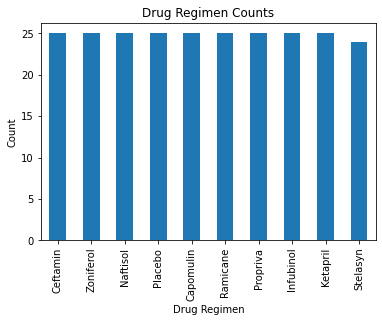

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count_df["Drug Regimen"].value_counts().plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Drug Regimen Counts")
plt.show()

In [11]:
drug_list = mouse_ndata["Drug Regimen"].unique()
drug_list

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

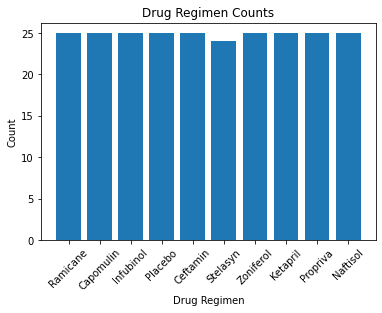

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_list = mouse_ndata["Drug Regimen"].unique()
drug_count = []
for drug in drug_list:
    drug_count.append(mouse_count_df.loc[mouse_count_df["Drug Regimen"] == drug, "Drug Regimen"].count())

# add titles and such
plt.bar(drug_list, drug_count)
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Drug Regimen Counts")
plt.show()

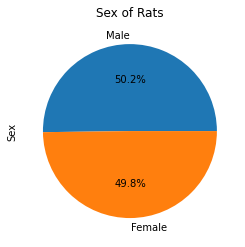

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_count_df["Sex"].value_counts().plot(kind="pie", autopct="%.1f%%")
plt.title("Sex of Rats")
plt.show()

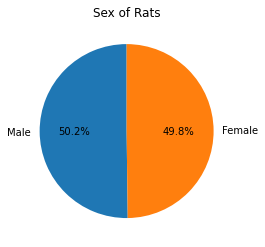

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_list = mouse_count_df["Sex"].unique()
sex_count = []
for sex in sex_list:
    sex_count.append(mouse_count_df.loc[mouse_count_df["Sex"] == sex, "Sex"].count())

# add titles and such
plt.pie(sex_count, labels=sex_list, autopct="%.1f%%", startangle=90)
plt.title("Sex of Rats")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = mouse_data.drop_duplicates(subset=["Mouse ID"], keep="last")

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list2 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list2:
    tum_list = last_tp.loc[last_tp["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    quartiles = tum_list.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    
    # very weird step I took to make a list of outlier mouse heh
    tum_list_out = last_tp.loc[last_tp["Drug Regimen"] == drug, ["Mouse ID", "Tumor Volume (mm3)"]]
    outlier_upper = tum_list_out.loc[tum_list_out["Tumor Volume (mm3)"] > upperbound]
    outlier_lower = tum_list_out.loc[tum_list_out["Tumor Volume (mm3)"] < lowerbound]
    frame = [outlier_upper, outlier_lower]
    outlier_list = pd.concat(frame)
    del outlier_list["Tumor Volume (mm3)"]
    
    # print output
    print(f"IQR for {drug} is {round(iqr, 2)}.")
    print(f"Outlier rat for this drug is {outlier_list}.")
    print(f"--------------------------------------------")

IQR for Capomulin is 7.78.
Outlier rat for this drug is Empty DataFrame
Columns: [Mouse ID]
Index: [].
--------------------------------------------
IQR for Ramicane is 9.1.
Outlier rat for this drug is Empty DataFrame
Columns: [Mouse ID]
Index: [].
--------------------------------------------
IQR for Infubinol is 11.48.
Outlier rat for this drug is     Mouse ID
669     c326.
--------------------------------------------
IQR for Ceftamin is 15.58.
Outlier rat for this drug is Empty DataFrame
Columns: [Mouse ID]
Index: [].
--------------------------------------------


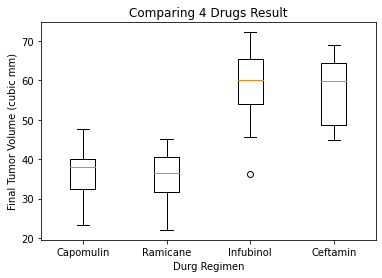

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# generate each drug data
capo_final = last_tp.loc[last_tp["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
rami_final = last_tp.loc[last_tp["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
infu_final = last_tp.loc[last_tp["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
ceft_final = last_tp.loc[last_tp["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]

# plot them into one picture, and add titles and such
plt.boxplot(capo_final, positions=[1], widths=0.3)
plt.boxplot(rami_final, positions=[2], widths=0.3)
plt.boxplot(infu_final, positions=[3], widths=0.3)
plt.boxplot(ceft_final, positions=[4], widths=0.3)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.xlabel("Durg Regimen")
plt.ylabel("Final Tumor Volume (cubic mm)")
plt.title("Comparing 4 Drugs Result")
plt.show()

## Line and Scatter Plots

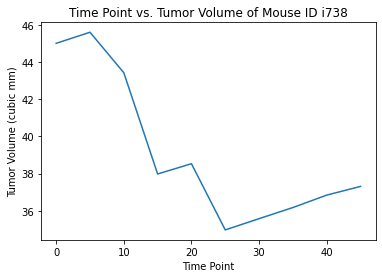

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
import random

# randomly choose a mouse from the Capomulin drug
capomulin_df = mouse_ndata.loc[mouse_ndata["Drug Regimen"] == "Capomulin", ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
capo_mouse_list = capomulin_df["Mouse ID"].unique()
chosen_rat = random.choice(capo_mouse_list)
chosen_df_1 = capomulin_df.loc[capomulin_df["Mouse ID"] == chosen_rat, :]

# make plot out of the randomly chosen rat
x_axis = chosen_df_1["Timepoint"]
y_axis = chosen_df_1["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, linestyle="-")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (cubic mm)")
plt.title("Time Point vs. Tumor Volume of Mouse ID " + chosen_rat)
plt.show()

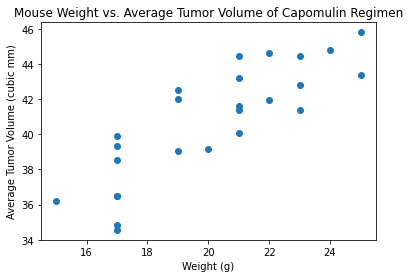

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df2 = mouse_ndata.loc[mouse_ndata["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capo_mean_df = capomulin_df2.groupby("Mouse ID").mean()
x_axis_capo = capo_mean_df["Weight (g)"]
y_axis_capo = capo_mean_df["Tumor Volume (mm3)"]
plt.scatter(x_axis_capo, y_axis_capo)

# add titles and such
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (cubic mm)")
plt.title("Mouse Weight vs. Average Tumor Volume of Capomulin Regimen")
plt.show()

## Correlation and Regression

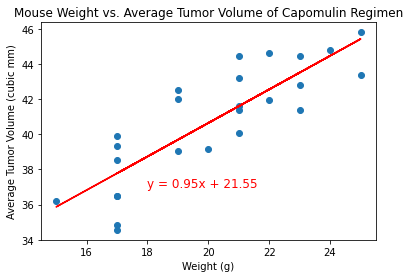

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_capo, y_axis_capo)
regress_value = x_axis_capo * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# add titles and such
plt.scatter(x_axis_capo, y_axis_capo)
plt.plot(x_axis_capo, regress_value, "r-")
plt.annotate(line_eq, (18, 37), fontsize=12, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (cubic mm)")
plt.title("Mouse Weight vs. Average Tumor Volume of Capomulin Regimen")
plt.show()